# RQ2 - Domains

Uses:

- resources/historical_join_db.xlsx (HISTORICAL_FILE_JOIN_DB from prepare/historic_count_models.ipynb)
- resources/annotated_java_filtered_by_slice.xlsx (ANNOTATED_FILE_JAVA)

Generates:

- domain_dbmodels.pdf (fig:domain_dbmodels)

Variables:

- rq2_data_management_both
- rq2_data_management_sql
- rq2_data_management_nosql
- rq2_corpus_domains
- rq2_domain_predominant
- rq2_hpc_ext



In [3]:
import sys  
sys.path.insert(1, '..')

In [4]:
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from num2words import num2words

from util import RESOURCE_DIR, IMAGES_DIR, HISTORICAL_FILE_JOIN_DB
from analysis_helpers import var, load_vars, relative_var

In [5]:
historical_join_db = pd.read_excel(HISTORICAL_FILE_JOIN_DB, keep_default_na=False)
historical_join_db['Model'].replace({'SQL': 'Relational'}, regex=True, inplace=True)
historical_join_db['Model'].replace({'NoRelational': 'Non Relational'}, regex=True, inplace=True)
historical_join_db.head()


,Databases,Primary Model,Second Model,Model,Activiti/Activiti,Alluxio/alluxio,AlmasB/FXGL,AntennaPod/AntennaPod,AnySoftKeyboard/AnySoftKeyboard,AsyncHttpClient/async-http-client,...,vipshop/Saturn,vsch/flexmark-java,webbukkit/dynmap,wildfly/wildfly,winder/Universal-G-Code-Sender,xuxueli/xxl-job,yacy/yacy_search_server,zaproxy/zaproxy,zendesk/maxwell,zxing/zxing
0,Aerospike,Key-value,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ArangoDB,Multi-Model,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cassandra,Wide column,,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ClickHouse,Relational,Multi-model,Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Couchbase,Document,Multi-model,Non Relational,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
result_databases_models = historical_join_db
organizing_per_model = result_databases_models.groupby(['Model']).sum()
organizing_per_model = organizing_per_model.mask(organizing_per_model > 0, True)
organizing_per_model = organizing_per_model.mask(organizing_per_model == 0, False)
organizing_per_model = organizing_per_model.transpose()
organizing_per_model = organizing_per_model.rename(columns={'Non Relational': 'NoSQL', 'Relational':'SQL'})
organizing_per_model

Model,NoSQL,SQL
Activiti/Activiti,True,True
Alluxio/alluxio,True,True
AlmasB/FXGL,False,False
AntennaPod/AntennaPod,False,False
AnySoftKeyboard/AnySoftKeyboard,False,True
...,...,...
xuxueli/xxl-job,True,True
yacy/yacy_search_server,True,True
zaproxy/zaproxy,False,True
zendesk/maxwell,True,True


In [7]:
relational = pd.DataFrame(data = organizing_per_model.SQL)
nonRelational = pd.DataFrame(data = organizing_per_model.NoSQL)
relational.reset_index(inplace=True)
nonRelational.reset_index(inplace=True)

relational = relational.rename(columns={'index' : 'Projects'})
nonRelational = nonRelational.rename(columns={'index' : 'Projects'})

In [8]:
models_of_database_per_project = pd.merge(relational, nonRelational, left_on='Projects', right_on='Projects')

def identify_model (row):
    if (row['SQL'] and row['NoSQL']):
        return 'Both'
    else:
        if(row['SQL']):
            return 'Relational'
        if(row['NoSQL']):
            return 'Non Relational'

models_of_database_per_project['Model'] = models_of_database_per_project.apply(lambda row: identify_model(row), axis= 1)

models_of_database_per_project[models_of_database_per_project['Model'].isnull()] # Retira quem não tem modelo, por isso o valor fica menor.
models_of_database_per_project.dropna(subset=['Model'], inplace= True)
#models_of_database_per_project.to_excel('modelsTeste.xlsx')
models_of_database_per_project

,Projects,SQL,NoSQL,Model
0,Activiti/Activiti,True,True,Both
1,Alluxio/alluxio,True,True,Both
4,AnySoftKeyboard/AnySoftKeyboard,True,False,Relational
6,Athou/commafeed,True,True,Both
7,Atmosphere/atmosphere,False,True,Non Relational
...,...,...,...,...
355,wildfly/wildfly,True,False,Relational
357,xuxueli/xxl-job,True,True,Both
358,yacy/yacy_search_server,True,True,Both
359,zaproxy/zaproxy,True,False,Relational


In [9]:
models_of_database_per_project

,Projects,SQL,NoSQL,Model
0,Activiti/Activiti,True,True,Both
1,Alluxio/alluxio,True,True,Both
4,AnySoftKeyboard/AnySoftKeyboard,True,False,Relational
6,Athou/commafeed,True,True,Both
7,Atmosphere/atmosphere,False,True,Non Relational
...,...,...,...,...
355,wildfly/wildfly,True,False,Relational
357,xuxueli/xxl-job,True,True,Both
358,yacy/yacy_search_server,True,True,Both
359,zaproxy/zaproxy,True,False,Relational


In [10]:
from util import ANNOTATED_FILE_JAVA
#annotated_java = pd.read_excel(RESOURCE_DIR + os.sep + "annotated_java.xlsx")
annotated_java = pd.read_excel(ANNOTATED_FILE_JAVA)
# Fix typos
annotated_java['domain'] = annotated_java['domain'].str.replace('infrastructure Management', 'Infrastructure Management')
annotated_java['domain'] = annotated_java['domain'].str.replace('Artificial Intelligence ', 'Artificial Intelligence')
annotated_java['ref'] = annotated_java['owner'] + '/' + annotated_java['name']

characterization_of_projects = pd.merge(models_of_database_per_project, annotated_java, left_on='Projects', right_on='ref', how="left")

characterization_of_projects = characterization_of_projects[characterization_of_projects['discardReason'].isna()]

characterization_of_projects.head()

,Projects,SQL,NoSQL,Model,owner,name,createdAt,pushedAt,isMirror,diskUsage,...,pullRequests,branches,tags,releases,url,description,isSoftware,discardReason,domain,ref
0,Activiti/Activiti,True,True,Both,Activiti,Activiti,2012-09-13 11:34:43,2019-08-23 12:02:11,False,95935,...,1411,74,263,23,http://www.github.com/Activiti/Activiti,Activiti is a light-weight workflow and Busine...,Y,NaN,Enterprise Resource Planning,Activiti/Activiti
1,Alluxio/alluxio,True,True,Both,Alluxio,alluxio,2012-12-21 17:43:46,2019-08-23 07:04:32,False,112811,...,9398,24,58,32,http://www.github.com/Alluxio/alluxio,"Alluxio, data orchestration for analytics and ...",Y,NaN,Data Management,Alluxio/alluxio
2,AnySoftKeyboard/AnySoftKeyboard,True,False,Relational,AnySoftKeyboard,AnySoftKeyboard,2012-04-18 12:38:01,2019-08-21 16:43:46,False,131594,...,556,15,93,41,http://www.github.com/AnySoftKeyboard/AnySoftK...,Android (f/w 2.1+) on screen keyboard for mult...,Y,NaN,Other,AnySoftKeyboard/AnySoftKeyboard
3,Athou/commafeed,True,True,Both,Athou,commafeed,2013-03-20 19:32:09,2019-07-04 06:40:13,False,8691,...,290,4,14,4,http://www.github.com/Athou/commafeed,Google Reader inspired self-hosted RSS reader.,Y,NaN,Collaboration,Athou/commafeed
4,Atmosphere/atmosphere,False,True,Non Relational,Atmosphere,atmosphere,2010-06-30 14:26:23,2019-08-05 18:37:04,False,110868,...,330,19,199,0,http://www.github.com/Atmosphere/atmosphere,"Realtime Client Server Framework for the JVM, ...",Y,NaN,Network,Atmosphere/atmosphere


In [11]:
characterization_of_projects['domain'].value_counts()

Data Management                 59
Software Development            53
Infrastructure Management       27
Security                        14
Program Analysis                12
Automation                      11
Monitoring                      11
Enterprise Resource Planning     8
Network                          8
Collaboration                    6
Artificial Intelligence          6
Game                             5
Media                            4
File Management                  3
Other                            3
Cryptocurrency                   2
Finances                         1
Personal Management              1
Name: domain, dtype: int64

In [12]:
projects_with_db_relational = characterization_of_projects['Model'] == 'Relational'
projects_with_db_NoSQL = characterization_of_projects['Model'] == 'Non Relational'
projects_with_db_multimodel = characterization_of_projects['Model'] == "Both"

projects_with_db_relational = characterization_of_projects[projects_with_db_relational]
projects_with_db_NoSQL = characterization_of_projects[projects_with_db_NoSQL]
projects_with_db_multimodel = characterization_of_projects[projects_with_db_multimodel]

### Domain x Model

In [13]:
selecaoR = projects_with_db_relational['domain'].value_counts()
selecaoR = pd.DataFrame(data=selecaoR)
selecaoR.reset_index(inplace= True)
selecaoR.rename(columns={'domain' : 'amount'})
print(selecaoR)

                           index  domain
0           Software Development      23
1                Data Management      13
2               Program Analysis       6
3      Infrastructure Management       4
4                       Security       4
5   Enterprise Resource Planning       3
6                           Game       3
7        Artificial Intelligence       3
8                     Automation       3
9                          Media       2
10                    Monitoring       2
11                         Other       1
12                Cryptocurrency       1
13                 Collaboration       1


In [14]:
selecaoNR = projects_with_db_NoSQL['domain'].value_counts()
selecaoNR = pd.DataFrame(data=selecaoNR)
selecaoNR.reset_index(inplace= True)
selecaoNR.rename(columns={'domain' : 'amount'})
print(selecaoNR)

                        index  domain
0        Software Development      10
1   Infrastructure Management       6
2             Data Management       6
3                    Security       3
4                     Network       2
5                  Monitoring       2
6                       Other       2
7            Program Analysis       1
8                  Automation       1
9             File Management       1
10    Artificial Intelligence       1


In [15]:
selecaoM = projects_with_db_multimodel['domain'].value_counts()
selecaoM = pd.DataFrame(data=selecaoM)
selecaoM.reset_index(inplace= True)
selecaoM.rename(columns={'domain' : 'amount'})
print(selecaoM)

                           index  domain
0                Data Management      40
1           Software Development      20
2      Infrastructure Management      17
3                       Security       7
4                     Automation       7
5                     Monitoring       7
6                        Network       6
7   Enterprise Resource Planning       5
8                  Collaboration       5
9               Program Analysis       5
10                          Game       2
11                         Media       2
12       Artificial Intelligence       2
13               File Management       2
14                Cryptocurrency       1
15                      Finances       1
16           Personal Management       1


In [16]:
M = selecaoM.set_index("index")["domain"].to_dict()
NR = selecaoNR.set_index("index")["domain"].to_dict()

In [17]:
teste = pd.concat([selecaoR['index'], selecaoNR['index'], selecaoM['index']]).unique()
table = pd.DataFrame(data=teste, columns = ['domain'])
table['Relational'] = selecaoR['domain']
table['Non Relational'] = table['domain'].map(NR)
table['Both'] = table['domain'].map(M)
table = table.fillna(0)
table = table.astype({'Relational':'int', 'Non Relational': 'int', 'Both': 'int'})
table = table.rename(columns = {'domain' : 'Domain'})
table['Total'] = table['Relational'] + table['Non Relational'] + table['Both']
sorted_table = table.sort_values(by='Total', ascending=False)

df = pd.DataFrame(table)
sorted_df = df.sort_values(by='Total', ascending=False)
sorted_df

table = sorted_df.set_index('Domain')
table

,Relational,Non Relational,Both,Total
Domain,,,,
Data Management,13,6,40,59
Software Development,23,10,20,53
Infrastructure Management,4,6,17,27
Security,4,3,7,14
Program Analysis,6,1,5,12
Automation,3,1,7,11
Monitoring,2,2,7,11
Enterprise Resource Planning,3,0,5,8
Network,0,2,6,8


In [18]:
table.drop('Total', axis=1, inplace=True)

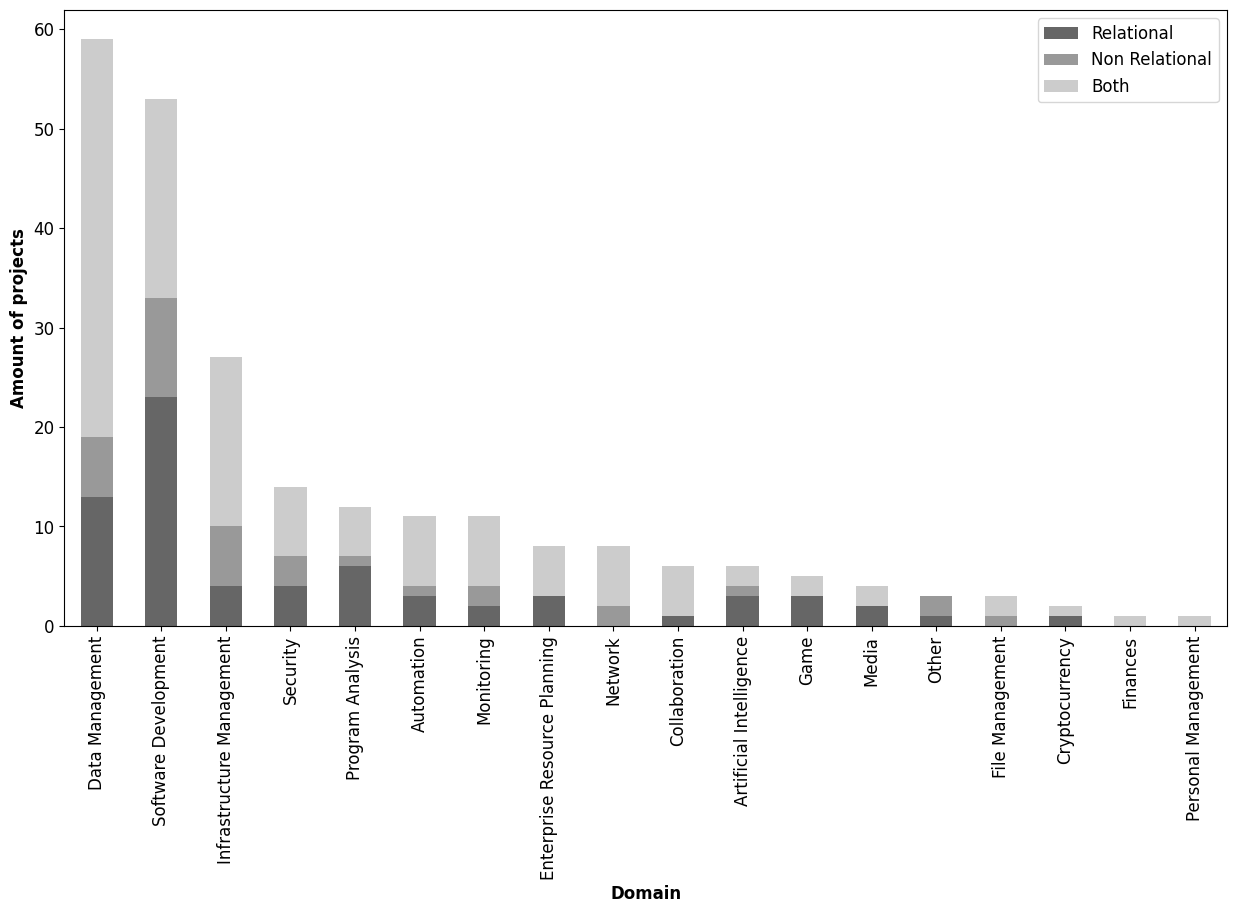

In [19]:
fig = plt.figure(figsize= (15, 8))
ax = plt.gca()
sns.set_palette(sns.color_palette("gray", 4)[1:])
table.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(table.index, rotation = 90, fontsize = 12)
ax.set_xlabel("Domain",fontsize = 12, fontweight = 'bold')
ax.set_ylabel("Amount of projects",fontsize = 12, fontweight = 'bold')
plt.yticks(range(0, 61, 10), fontsize=12)
ax.legend(fontsize = 12)
plt.savefig(IMAGES_DIR+"/domain_dbmodels.pdf", format="pdf", bbox_inches="tight")

In [20]:
assert table["Both"].idxmax() == 'Data Management', "Paper: 'This co-occurrence of models was especially prevalent in projects of the Data Management domain.'"

In [21]:
print("Data Management that uses both relational and non-relational", var("rq2_data_management_both", table["Both"]["Data Management"]))
print("Data Management that uses relational", var("rq2_data_management_sql", table["Relational"]["Data Management"]))
print("Data Management that uses non-relational", var("rq2_data_management_nosql", table["Non Relational"]["Data Management"]))

Data Management that uses both relational and non-relational 40
Data Management that uses relational 13
Data Management that uses non-relational 6


In [22]:
dataset_domains = set(annotated_java['domain'].fillna(0).unique()) - {0}
print("Corpus domains:", var("rq2_corpus_domains", len(dataset_domains)))
print("Both predominant in:", relative_var("rq2_domain_predominant", len(table[(table["Both"] > table["Relational"]) & (table["Both"] > table["Non Relational"])]), len(dataset_domains)))

Corpus domains: 19
Both predominant in: 11 (57.9%)


In [23]:
assert table["Relational"][["Personal Management", "Finances"]].to_list() == [0, 0], "Paper: 'For instance, all projects from the Personal Management and Finances domains use only multi-model DBMSs.'"

In [24]:
assert (((table["Relational"] == 0) | (table["Non Relational"] == 0)) & (table["Both"] == 0)).sum() == 0, "Paper: 'We also observed that no domain used only one DBMS model.'"

In [25]:
hpc_projects = annotated_java[(annotated_java["domain"] == "High Performance Computing") & annotated_java["discardReason"].isna()]
print("Number of hpc projects:", var("rq2_hpc_ext", num2words(len(hpc_projects))))

Number of hpc projects: three


In [26]:
assert len(set(characterization_of_projects["Projects"].to_list()) & set(hpc_projects["ref"].to_list())) == 0, "Paper: 'projects in the High-Performance Computing domain showed no indication of database usage.'"

### _Boxplots

(Not used in the paper)

Text(0.5, 1.0, 'Mean languages for each database model')

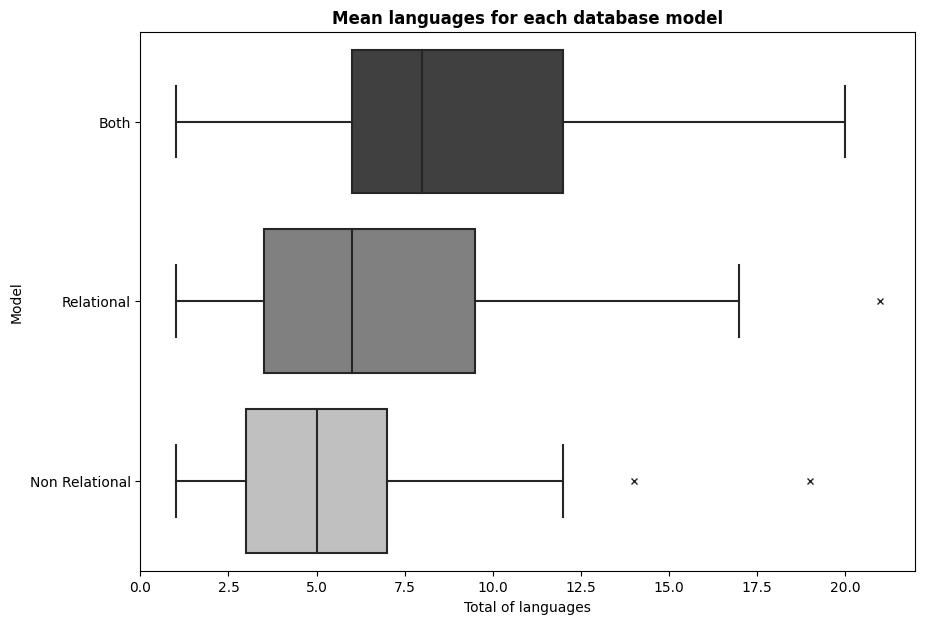

In [27]:
plt.figure(figsize=(10,7))
languages = characterization_of_projects[['Projects', 'Model', 'languages']]
valor = languages['languages']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
languages = languages[interval]
languages_graph = sns.boxplot(data=languages, x = "languages", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
languages_graph.set_xlabel('Total of languages')
languages_graph.set_title('Mean languages for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean diskUsage for each database model')

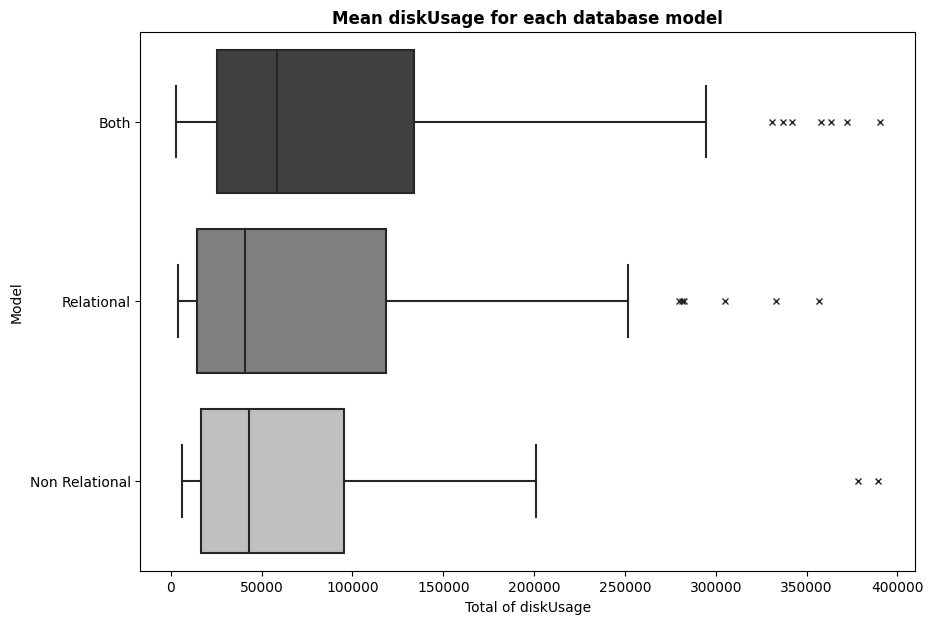

In [28]:
plt.figure(figsize=(10,7))
diskUsage = characterization_of_projects[['Projects', 'Model', 'diskUsage']]
valor = diskUsage['diskUsage']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
diskUsage = diskUsage[interval]
diskUsage_graph = sns.boxplot(data=diskUsage, x = "diskUsage", y = "Model", palette = 'gray', flierprops = {'marker': 'x'})
diskUsage_graph.set_xlabel('Total of diskUsage')
diskUsage_graph.set_title('Mean diskUsage for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean contributors for each database model')

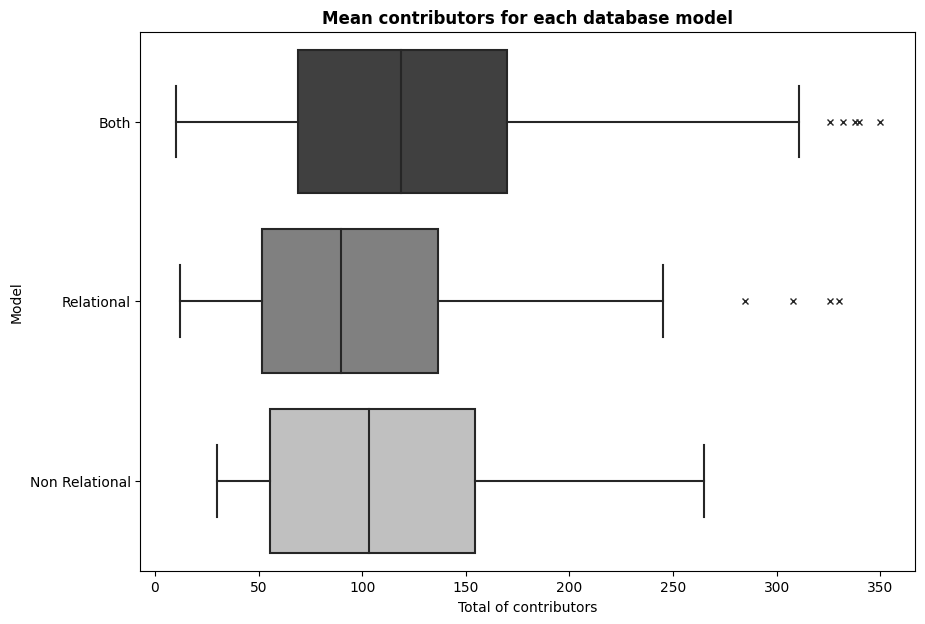

In [29]:
plt.figure(figsize=(10,7))
contributors = characterization_of_projects[['Projects', 'Model', 'contributors']]
valor = contributors['contributors']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
contributors = contributors[interval]
contributors_graph = sns.boxplot(data=contributors, x = "contributors", y = "Model", palette = 'gray',flierprops = {'marker': 'x'})
contributors_graph.set_xlabel('Total of contributors')
contributors_graph.set_title('Mean contributors for each database model', fontweight = 'bold')

Text(0.5, 1.0, 'Mean stars for each database model')

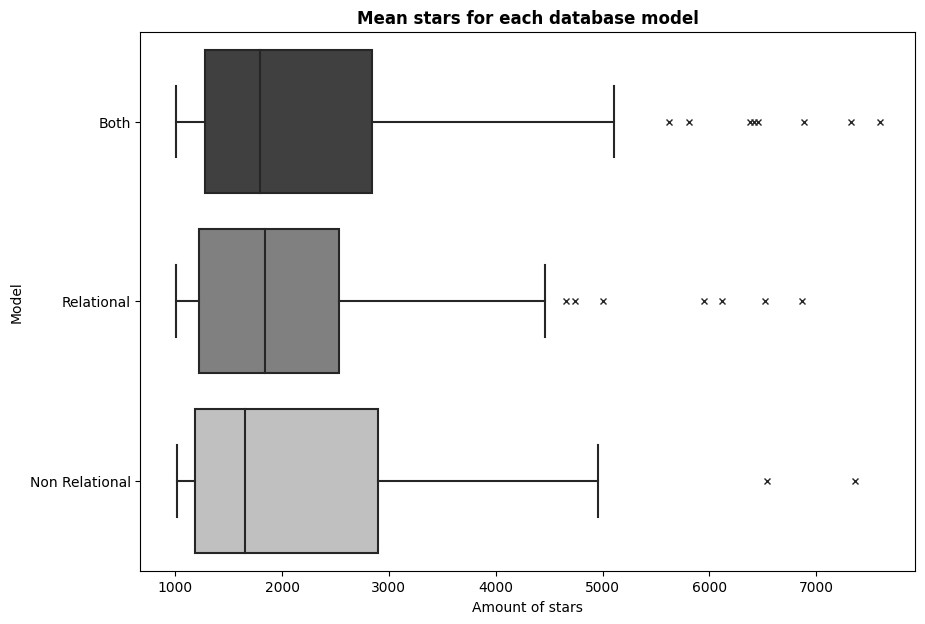

In [30]:
plt.figure(figsize=(10,7))
stars = characterization_of_projects[['Projects', 'Model', 'stargazers']]
valor = stars['stargazers']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inf = Q1 - 1.5 * IIQ
limite_sup = Q3 + 1.5 * IIQ
interval = (valor >= limite_inf) & (valor <= limite_sup)
stars = stars[interval]
stars_graph = sns.boxplot(data = stars, x = "stargazers", y = "Model", palette='gray', flierprops = {'marker': 'x'})
stars_graph.set_xlabel('Amount of stars')
stars_graph.set_title('Mean stars for each database model', fontweight = 'bold')

### _Other

In [31]:
multi_model = table.copy()
multi_model['Single-Model'] = multi_model['Relational'] + multi_model['Non Relational']
multi_model['Sum'] = multi_model['Single-Model'] + multi_model['Both']
del multi_model['Relational']
del multi_model['Non Relational']
multi_model['Multi-Model'] = multi_model['Both'] / multi_model['Sum']
multi_model['Single-Model'] = multi_model['Single-Model'] / multi_model['Sum']
del multi_model['Both']
del multi_model['Sum']
multi_model

,Single-Model,Multi-Model
Domain,,
Data Management,0.322034,0.677966
Software Development,0.622642,0.377358
Infrastructure Management,0.370370,0.629630
Security,0.500000,0.500000
Program Analysis,0.583333,0.416667
Automation,0.363636,0.636364
Monitoring,0.363636,0.636364
Enterprise Resource Planning,0.375000,0.625000
Network,0.250000,0.750000


In [32]:
most_frequentsMS = multi_model.copy()
most_frequentsMS = most_frequentsMS.loc[list(table.index[:5])].reset_index().copy()
most_frequentsMS

,Domain,Single-Model,Multi-Model
0,Data Management,0.322034,0.677966
1,Software Development,0.622642,0.377358
2,Infrastructure Management,0.370370,0.629630
3,Security,0.500000,0.500000
4,Program Analysis,0.583333,0.416667


Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

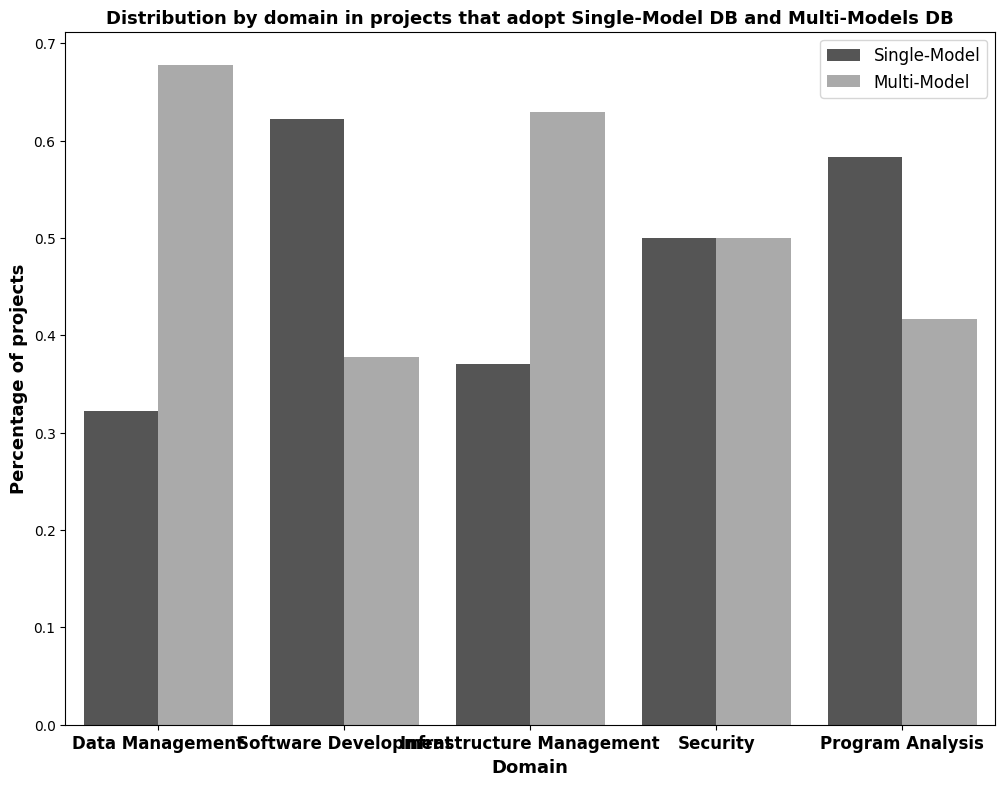

In [33]:
fig = plt.figure(figsize= (12, 9))
graph_most_frequentsMS = sns.barplot(data=most_frequentsMS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsMS.set_xticklabels(most_frequentsMS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsMS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsMS.legend(fontsize = 12)
graph_most_frequentsMS.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB')

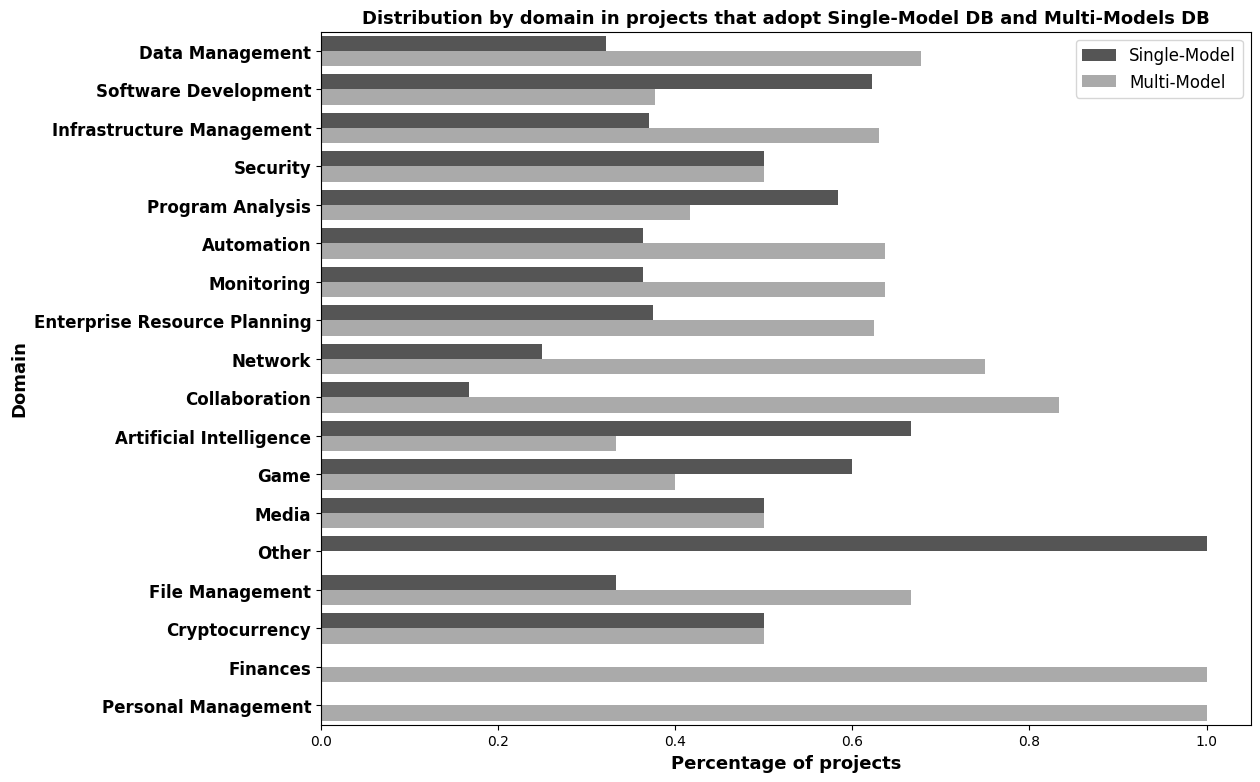

In [34]:
fig = plt.figure(figsize= (12, 9))
graph_multi_model = sns.barplot(data=multi_model.reset_index().melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_multi_model.set_yticklabels(multi_model.reset_index()['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_multi_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_multi_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_multi_model.legend(fontsize = 12)
graph_multi_model.set_title("Distribution by domain in projects that adopt Single-Model DB and Multi-Models DB", fontsize = 13, fontweight = 'bold')

In [35]:
single_model = table.copy()
single_model['Sum'] = single_model['Relational'] + single_model['Non Relational']
single_model['Relational'] = single_model['Relational'] / single_model['Sum']
single_model['Non Relational'] = single_model['Non Relational'] / single_model['Sum']
del single_model['Both']
del single_model['Sum']
single_model = single_model.dropna()
single_model

,Relational,Non Relational
Domain,,
Data Management,0.684211,0.315789
Software Development,0.696970,0.303030
Infrastructure Management,0.400000,0.600000
Security,0.571429,0.428571
Program Analysis,0.857143,0.142857
Automation,0.750000,0.250000
Monitoring,0.500000,0.500000
Enterprise Resource Planning,1.000000,0.000000
Network,0.000000,1.000000


In [36]:
most_frequentsS = single_model.copy()
most_frequentsS = most_frequentsS.loc[list(table.index[:5])].reset_index().copy()
most_frequentsS

,Domain,Relational,Non Relational
0,Data Management,0.684211,0.315789
1,Software Development,0.696970,0.303030
2,Infrastructure Management,0.400000,0.600000
3,Security,0.571429,0.428571
4,Program Analysis,0.857143,0.142857


Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

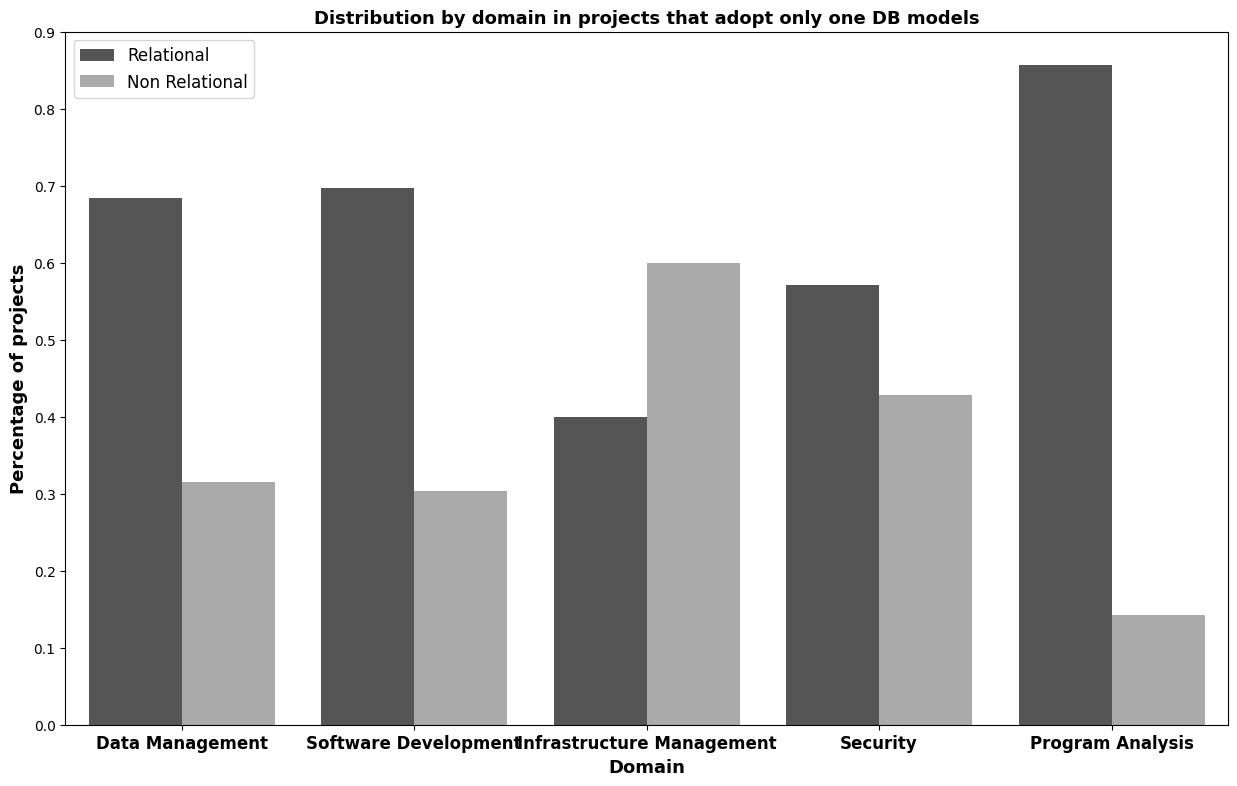

In [37]:
fig = plt.figure(figsize= (15, 9))
graph_most_frequentsS = sns.barplot(data= most_frequentsS.melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Domain', y = 'Amount of projects', hue='Model', palette='gray')
graph_most_frequentsS.set_xticklabels(most_frequentsS['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_most_frequentsS.set_xlabel("Domain",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.set_ylabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_most_frequentsS.legend(fontsize = 12)
graph_most_frequentsS.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

Text(0.5, 1.0, 'Distribution by domain in projects that adopt only one DB models')

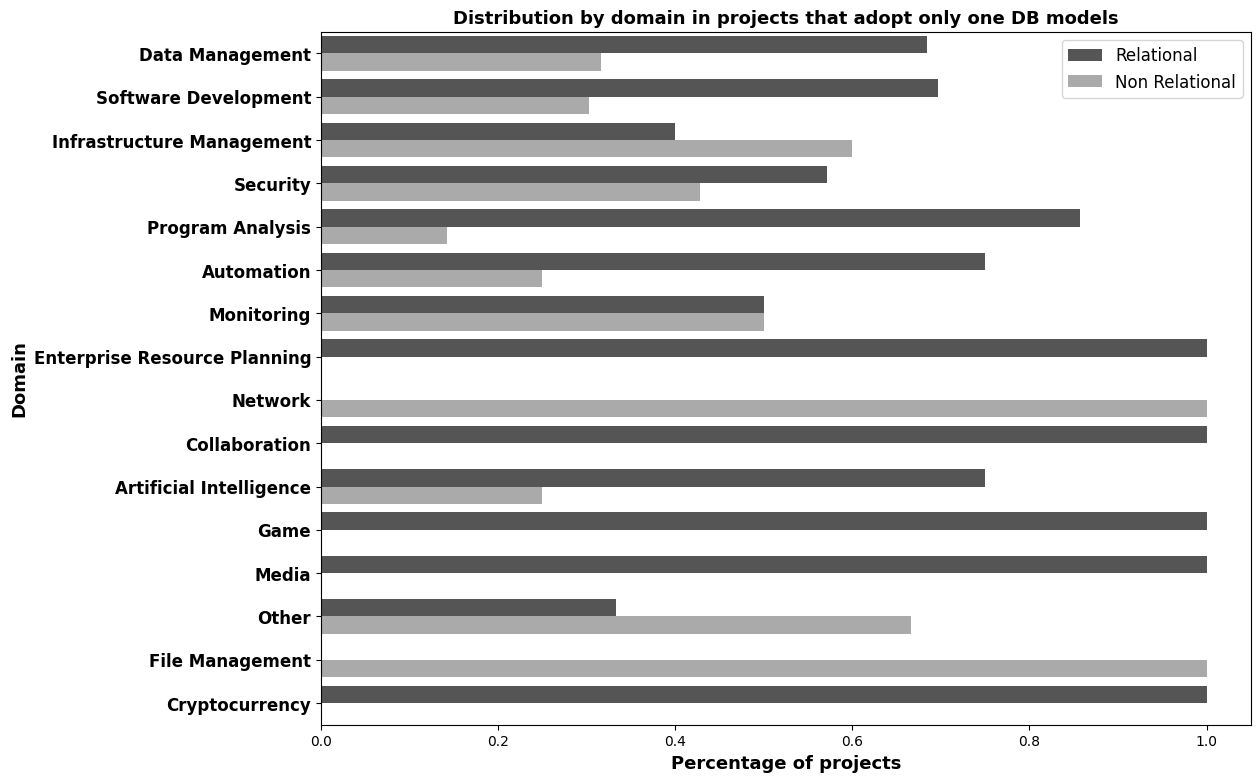

In [38]:
fig = plt.figure(figsize= (12, 9))
graph_single_model = sns.barplot(data= single_model.reset_index().melt(id_vars='Domain', value_name='Amount of projects', var_name= 'Model'), x = 'Amount of projects', y = 'Domain', hue='Model', palette='gray')
graph_single_model.set_yticklabels(single_model.reset_index()['Domain'],rotation = 0, fontsize = 12, fontweight = 'bold')
graph_single_model.set_ylabel("Domain",fontsize = 13, fontweight = 'bold')
graph_single_model.set_xlabel("Percentage of projects",fontsize = 13, fontweight = 'bold')
graph_single_model.legend(fontsize = 12)
graph_single_model.set_title("Distribution by domain in projects that adopt only one DB models", fontsize = 13, fontweight = 'bold')

Text(0, 0.5, 'Domain')

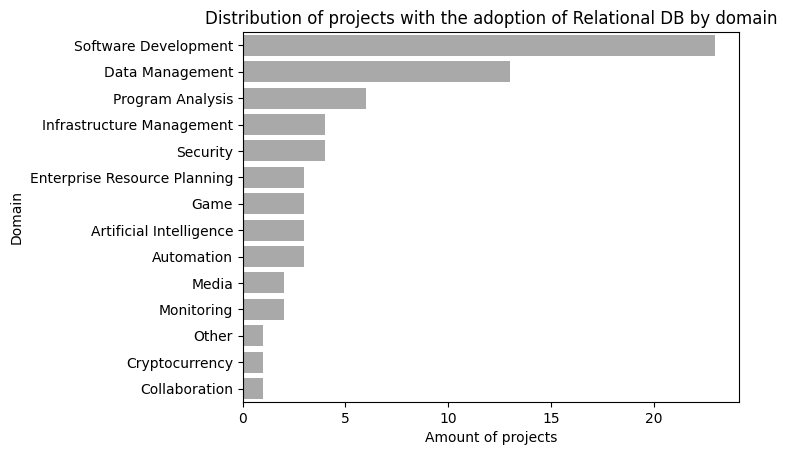

In [39]:
relational = sns.barplot(y=selecaoR['index'], x = selecaoR['domain'], color= 'darkgray')
relational.set_title("Distribution of projects with the adoption of Relational DB by domain")
relational.set_yticklabels(selecaoR['index'])
relational.set_xlabel('Amount of projects')
relational.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

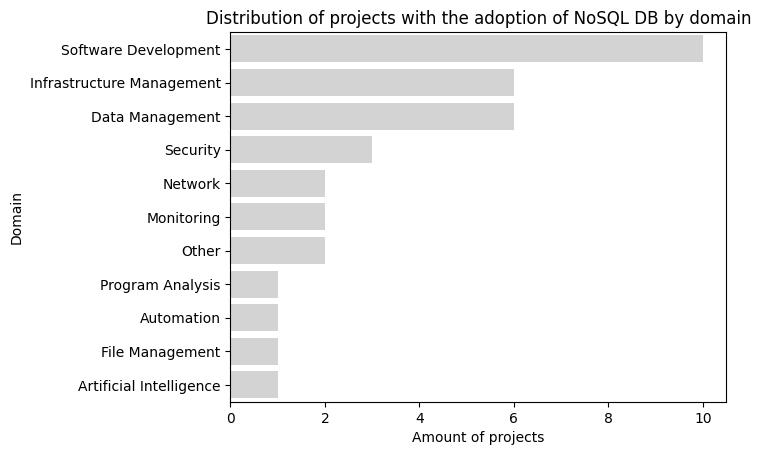

In [40]:
NoSQL = sns.barplot(y = selecaoNR['index'], x = selecaoNR['domain'], color= 'lightgray')
NoSQL.set_title("Distribution of projects with the adoption of NoSQL DB by domain")
NoSQL.set_xlabel('Amount of projects')
NoSQL.set_ylabel('Domain')

Text(0, 0.5, 'Domain')

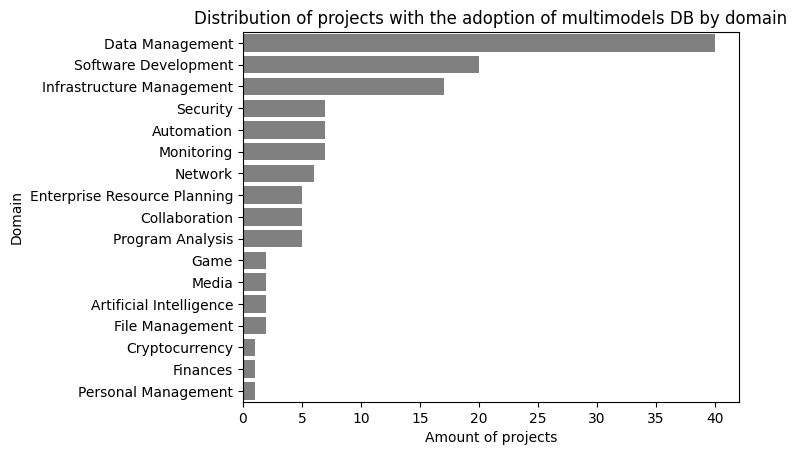

In [41]:
multimodel = sns.barplot(x=selecaoM['domain'], y = selecaoM['index'], color= 'gray')
multimodel.set_title("Distribution of projects with the adoption of multimodels DB by domain")
multimodel.set_xlabel('Amount of projects')
multimodel.set_ylabel('Domain')